In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
traffic = pd.read_json('./network_log.json')

In [3]:
traffic.sample(10)

,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime,url,url_index
13231,None,None,222621,200,True,0.543150,1507921749,http://www.facebook.com,1
47938,None,None,170911,200,True,0.249510,1507933790,http://www.microsoft.com,3
32301,None,None,222553,200,True,0.295797,1507927903,http://www.facebook.com,1
1281,None,None,222302,200,True,0.288464,1507918562,http://www.facebook.com,1
35231,None,None,222828,200,True,0.295189,1507928909,http://www.facebook.com,1
23941,None,None,222594,200,True,0.478543,1507924970,http://www.facebook.com,1
45287,None,None,46010,200,True,0.051192,1507932615,http://www.apple.com,2
24483,None,None,171027,200,True,0.304608,1507925151,http://www.microsoft.com,3
19764,None,None,150176,200,True,0.042612,1507923662,http://mbusa.com,4
30681,None,None,222495,200,True,0.604111,1507927366,http://www.facebook.com,1


In [4]:
traffic.groupby(['url','url_index']).count()

,,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime
url,url_index,,,,,,,
http://mbusa.com,4,50,50,11223,11223,11223,11223,11223
http://www.apple.com,2,49,49,11223,11223,11223,11223,11223
http://www.facebook.com,1,64,64,11223,11223,11223,11223,11223
http://www.google.com,0,48,48,11223,11223,11223,11223,11223
http://www.microsoft.com,3,50,50,11223,11223,11223,11223,11223


<IPython.core.display.Javascript object>


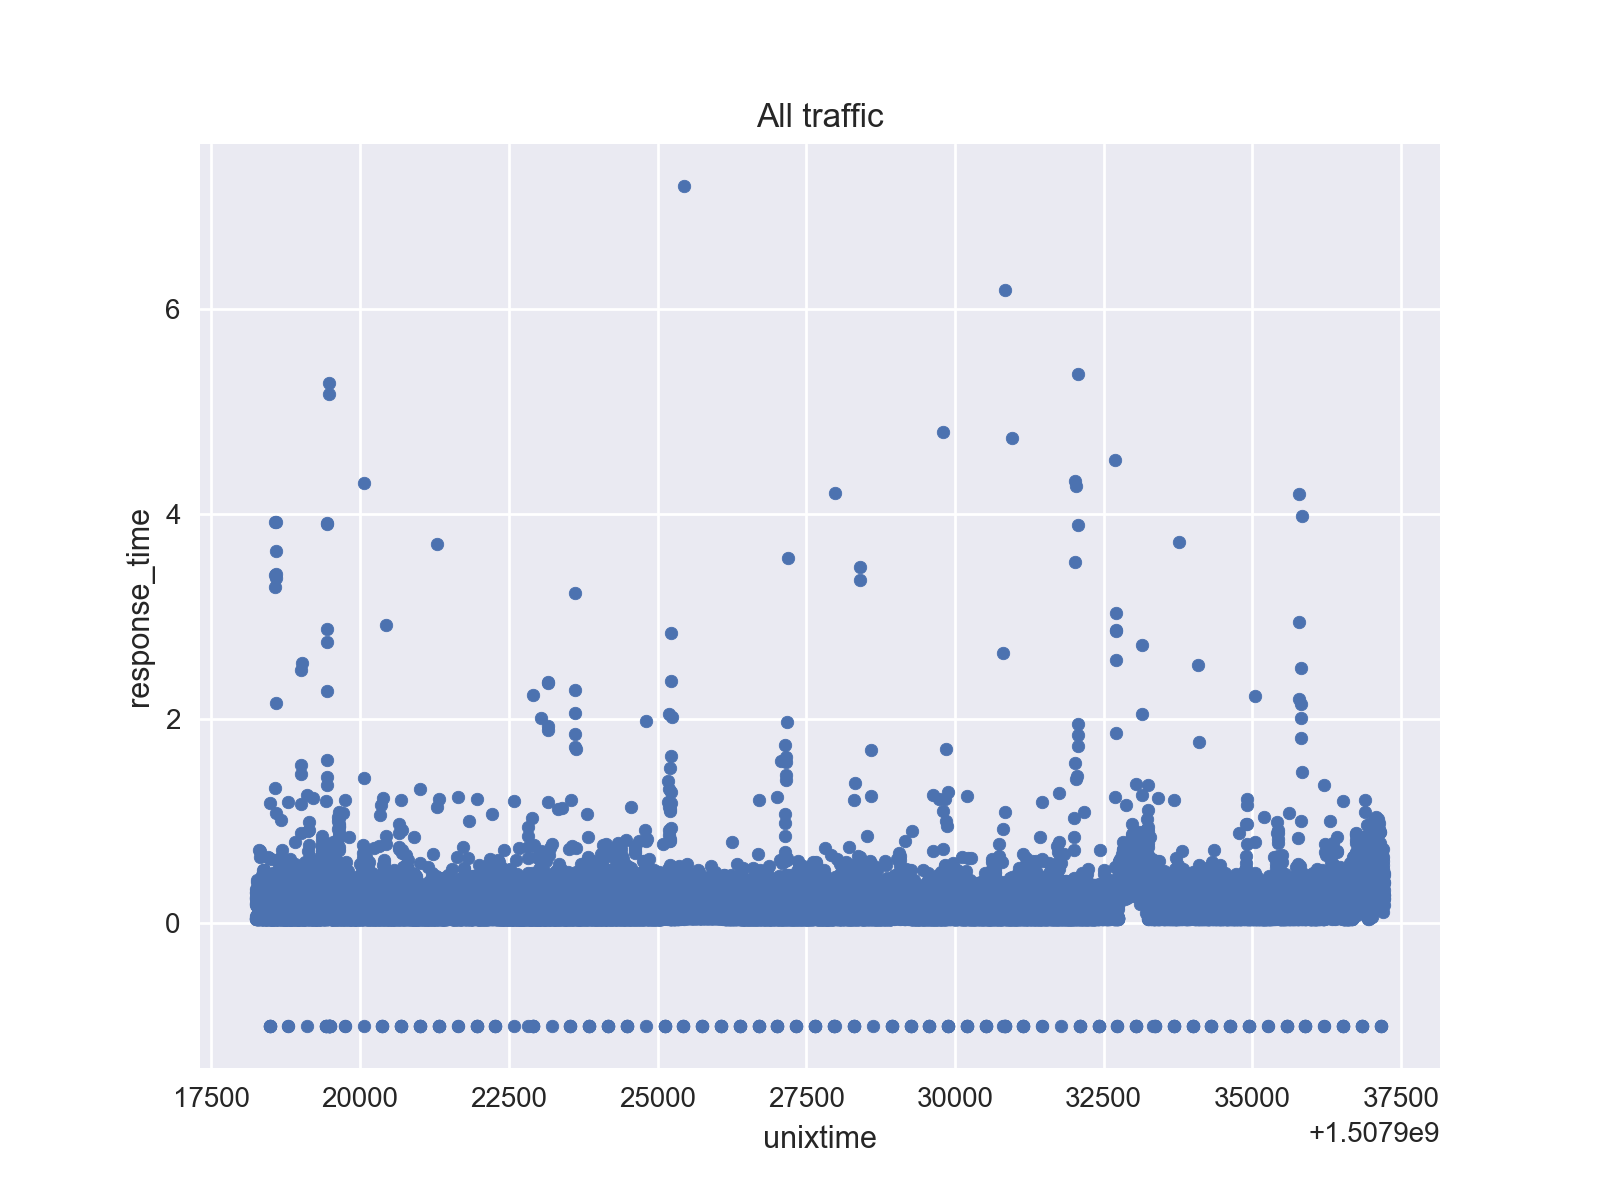

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
index = -1
if index < 0:
    plt.title('All traffic')
    traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
else:
    plt.title(traffic[traffic['url_index'] == index]['url'].unique()[0])
    traffic[traffic['url_index']==index].plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
# traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')

<IPython.core.display.Javascript object>


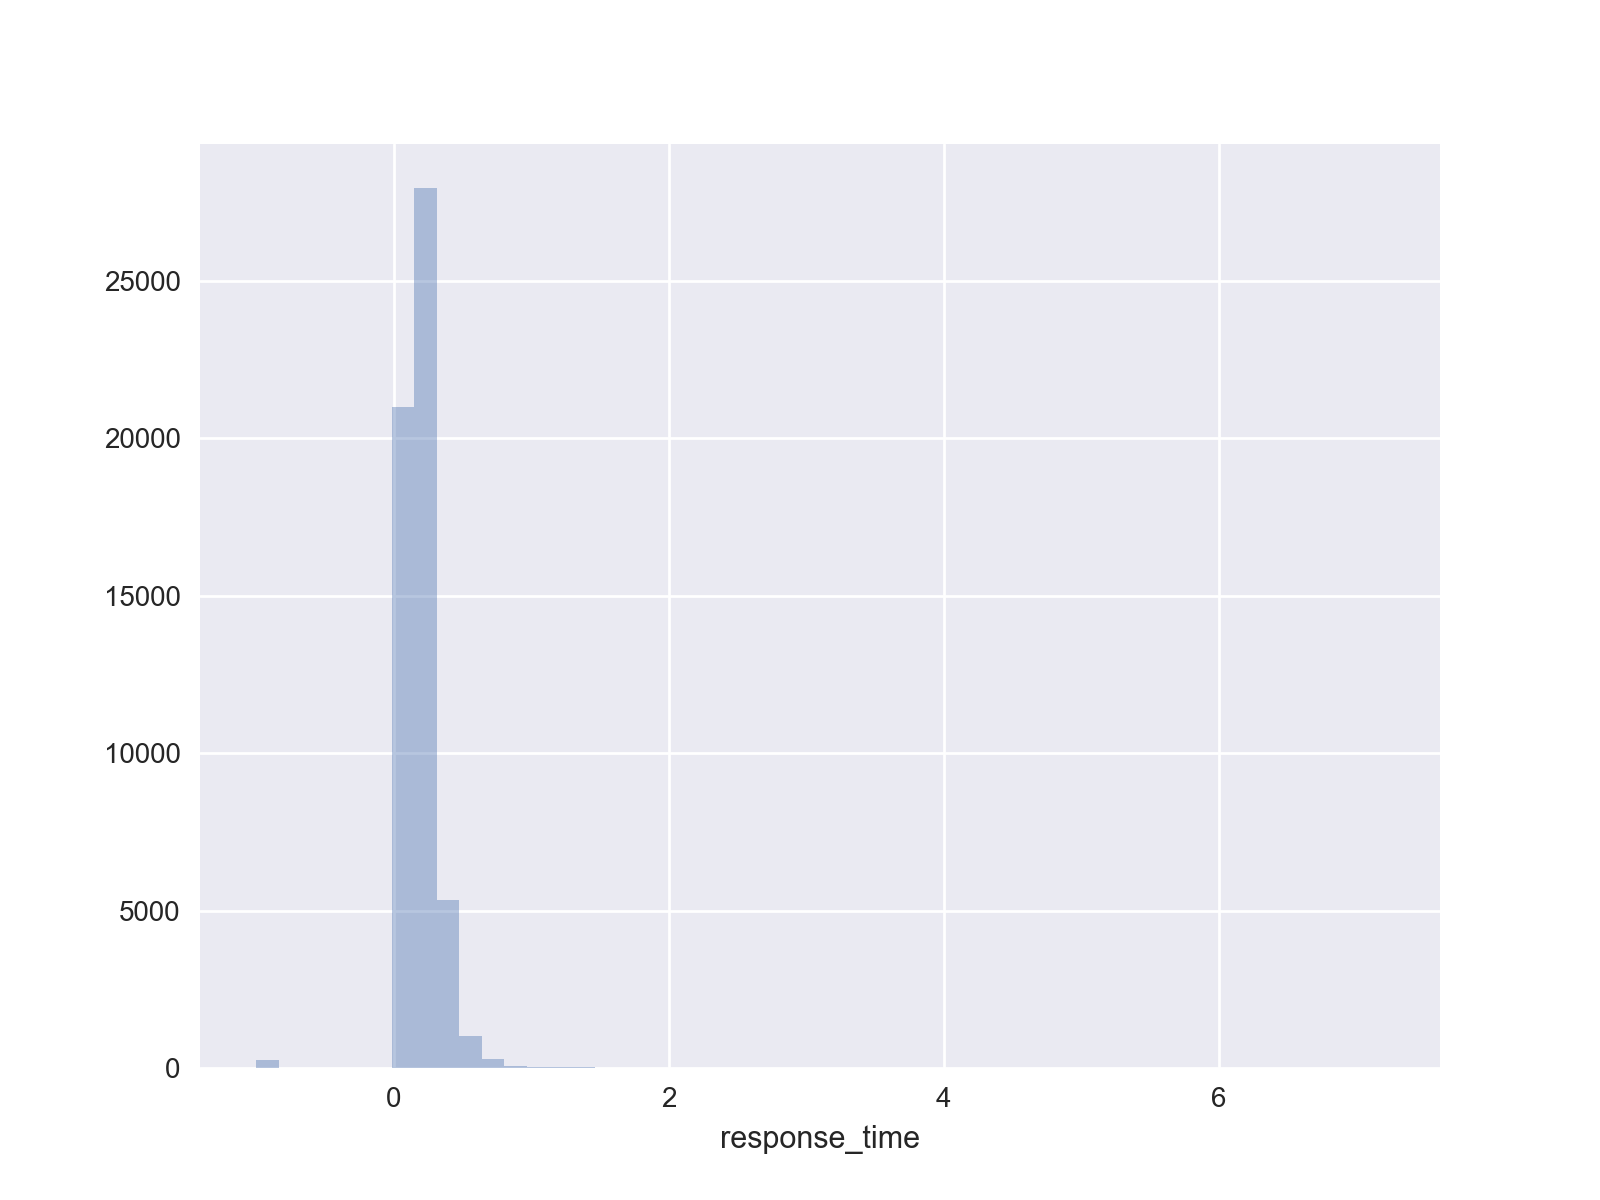

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(traffic.response_time, ax=ax, kde=False)

In [7]:
traffic['response_code'].unique()

array([200,  -1, 401])

<IPython.core.display.Javascript object>


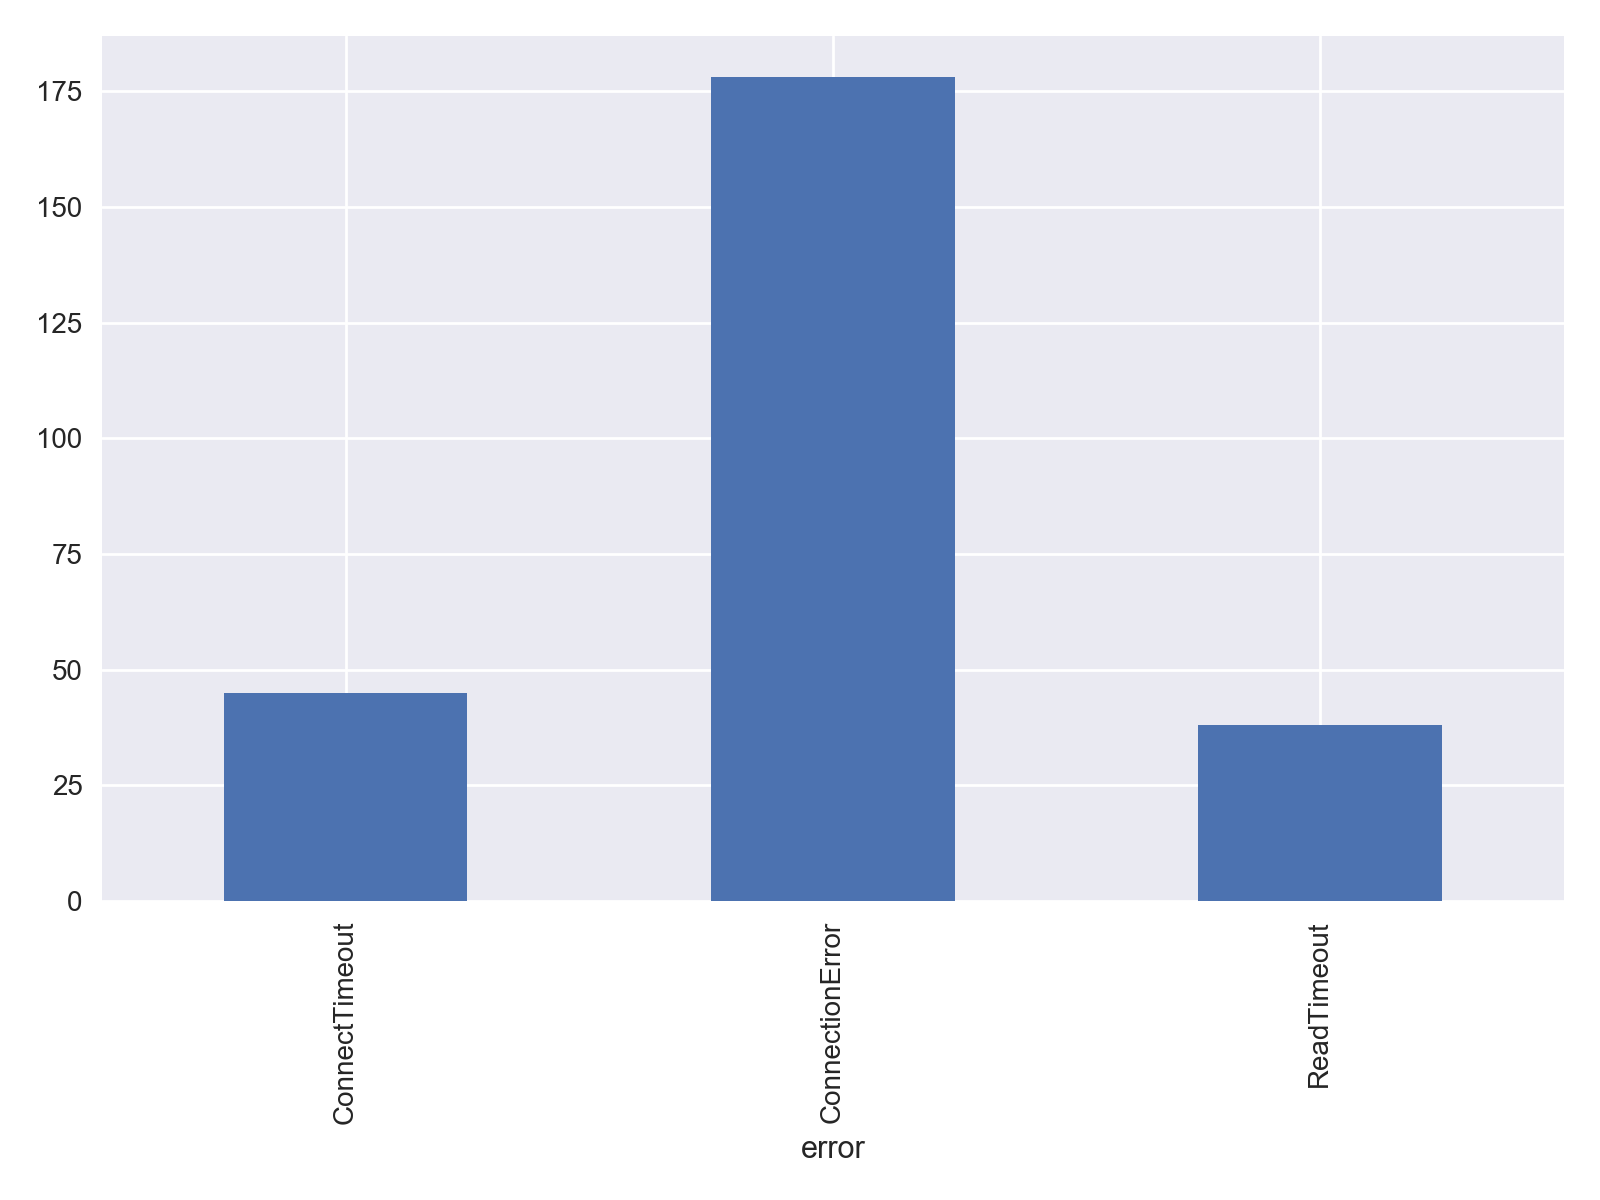

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
traffic.groupby(['error']).count()['url_index'].plot(kind='bar', ax=ax)
plt.tight_layout()